In [7]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import requests
from datetime import datetime, timezone

SESSION = requests.Session()
GOBLINS_URL = 'https://api.typingstats.com/event/typeracerhalloween2023/list?team=goblins&skip=0&limit=500'
GHOULS_URL = 'https://api.typingstats.com/event/typeracerhalloween2023/list?team=ghouls&skip=0&limit=500'

In [8]:
goblins_response = SESSION.get(GOBLINS_URL)
goblins_response.raise_for_status()

goblins_json = goblins_response.json()
print(json.dumps(goblins_json, indent=4))

{
    "status": 200,
    "message": "ok",
    "data": {
        "isNextPage": false,
        "results": [
            {
                "_id": "4YecdPgh3K4Th39Qu",
                "accountId": "237983286113210368",
                "uniqueId": "corsairchris",
                "matches": 855,
                "points": 164200,
                "team": "goblins",
                "profile": {
                    "_id": "2YuA5q2b5xZGiPj8r",
                    "accountId": "237983286113210368",
                    "displayName": "corsairchris",
                    "customUrl": "237983286113210368",
                    "avatarSrc": "https://data.typeracer.com/misc/pic?uid=tr:corsairchris"
                }
            },
            {
                "_id": "S1T2U3V4W5X6Y7Z8A",
                "accountId": "139884007973326848",
                "uniqueId": "iamslow103",
                "matches": 806,
                "points": 159119,
                "team": "goblins",
                "profile":

In [9]:
ghouls_response = SESSION.get(GHOULS_URL)
ghouls_response.raise_for_status()

ghouls_json = ghouls_response.json()
print(json.dumps(ghouls_json, indent=4))

{
    "status": 200,
    "message": "ok",
    "data": {
        "isNextPage": false,
        "results": [
            {
                "_id": "BamPjHhXpoqr6rh3Z",
                "accountId": "264785997051596800",
                "uniqueId": "moonlightcake",
                "matches": 1085,
                "points": 250013,
                "team": "ghouls",
                "profile": {
                    "_id": "Sw97KWRRRP6LaXbFq",
                    "accountId": "264785997051596800",
                    "displayName": "nyako",
                    "customUrl": "iloveyousomuch",
                    "avatarSrc": "https://lh3.googleusercontent.com/a/ACg8ocILEUXgIJOIDaXjj2x-Z2VZGqaHzimv_qSf-SQ22xz9Qw=s96-c"
                }
            },
            {
                "_id": "bdMk4mC6bZp5gCx3v",
                "accountId": "220590371900624896",
                "uniqueId": "rektless",
                "matches": 4341,
                "points": 206326,
                "team": "ghouls",
 

In [10]:
goblins_df = pd.DataFrame(goblins_json['data']['results'])[['points']].rename(index=lambda x: x + 1)
goblins_df.head()

,points
1,164200
2,159119
3,149584
4,106975
5,90149


In [11]:
ghouls_df = pd.DataFrame(ghouls_json['data']['results'])[['points']].rename(index=lambda x: x + 1)
ghouls_df.head()

,points
1,250013
2,206326
3,104049
4,93345
5,70278


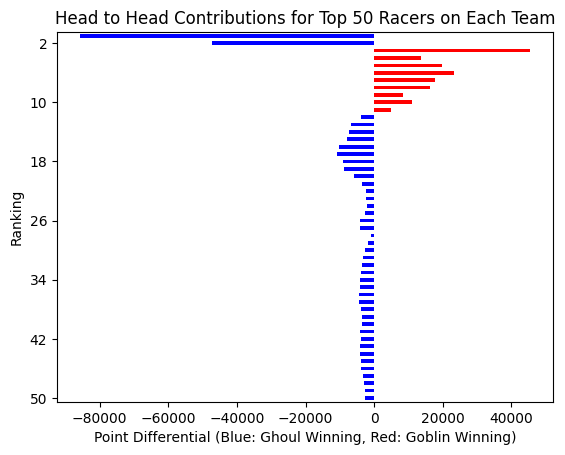

In [12]:
top_50_difference = goblins_df['points'].iloc[0:50] - ghouls_df['points'].iloc[0:50]
ax = top_50_difference.plot(
    kind='barh',
    title='Head to Head Contributions for Top 50 Racers on Each Team',
    xlabel='Point Differential (Blue: Ghoul Winning, Red: Goblin Winning)', 
    ylabel='Ranking',
    color=top_50_difference.apply(lambda x: 'red' if x > 0 else 'blue')
)
ax.set_yticks(range(1, 51, 8))
ax.invert_yaxis()

plt.savefig(f'./results/{datetime.now(timezone.utc)}.png')
plt.show()